# Spot enrichment tools


We need to go through all of the clustering steps before we can run any of these commands. We'll import a script that does all of this for us. If you'd like more information you can find it [here].

In [5]:
source("scripts//visium_obj.R")

Skipping install of 'Giotto' from a github remote, the SHA1 (1b60529f) has not changed since last install.
  Use `force = TRUE` to force installation




 giotto environment found at 
 /Users/natalie_dr/Library/r-miniconda/envs/giotto_env/bin/pythonw 
Giotto environment is already installed, set force_environment = TRUE to reinstall 
Consider to install these (optional) packages to run all possible Giotto commands:  scran MAST tiff biomaRt trendsceek multinet RTriangle FactoMiner
 Giotto does not automatically install all these packages as they are not absolutely required and this reduces the number of dependencies
 no external python path was provided, but a giotto python environment was found and will be used 
return_plot = TRUE and return_gobject = TRUE 

          plot will not be returned to object, but can still be saved with save_plot = TRUE or manually 
hvg  was found in the gene metadata information and will be used to select highly variable genes 


Warning message in runPCA_prcomp_irlba(x = t_giotto(expr_values), center = center, :
“ncp >= minimum dimension of x, will be set to minimum dimension of x - 1”
Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“did not converge--results might be invalid!; try increasing work or maxit”


### 1. Parametric analysis of gene set enrichment (PAGE)

---
We'll start by declaring our markers:

In [6]:
astro_epen_markers = c("Krt15" , "Apoc1" , "Igsf1" , "Gjb6" , "Slc26a3" ,
                       "1500015O10Rik" , "S1pr1" , "Riiad1" , "Cldn10" , "Itih3" ,
                       "Ccdc153" , "Cbs" , "C4b" , "Gm11627" , "Folr1" ,
                       "Calml4" , "Aqp4" , "Ppp1r3g" , "1700012B09Rik" , "Hes5")

gran_markers = c("Nr3c2", "Gabra5", "Tubgcp2", "Ahcyl2",
                 "Islr2", "Rasl10a", "Tmem114", "Bhlhe22", 
                 "Ntf3", "C1ql2")

cortex_hippo_markers = c("6330403A02Rik" , "Tekt5" , "Wipf3" , "1110032F04Rik" , "Lmo3" ,
                         "Nrep" , "Slc30a3" , "Plcxd2" , "D630023F18Rik" , "Nptx1" ,
                         "C1ql3" , "Ddit4l" , "Fezf2" , "Col24a1" , "Kcnf1" ,
                         "Tnnc1" , "Gm12371" , "3110035E14Rik" , "Nr4a2" , "Nr4a3")

oligo_markers = c("Efhd1" , "H2-Ab1" , "Enpp6" , "Ninj2" , "Bmp4" ,
                  "Tnr" , "Hapln2" , "Neu4" , "Wfdc18" , "Ccp110" ,
                  "Gm26834" , "Il23a" , "Arap2" , "Nkx2-9" , "Mal" ,
                  "Tmem2" , "Birc2" , "Cdkn1c" , "Pak4" , "Tmem88b")

Now we can make a [signature matrix](https://rubd.github.io/Giotto_site/reference/makeSignMatrixPAGE.html) for PAGE:

In [7]:
signature_matrix = makeSignMatrixPAGE(sign_names = c('Astro_ependymal',
                                                     'Granule',
                                                     'Cortex_hippocampus',
                                                     'Oligo_dendrocytes'),
                                      sign_list = list(astro_epen_markers,
                                                       gran_markers,
                                                       cortex_hippo_markers,
                                                       oligo_markers))

And finally, we can run our [PAGE](https://rubd.github.io/Giotto_site/reference/runPAGEEnrich.html)

In [10]:
# runSpatialEnrich() can also be used as a wrapper for all currently provided enrichment options
my_vis_object = runPAGEEnrich(gobject = my_vis_object,
                                 sign_matrix = signature_matrix,
                                 min_overlap_genes = 2)

[1] "Warning, NA only has NA overlapping genes. Will be removed."
[1] "Warning,  only has  overlapping genes. Will be removed."


Now let's visualize:

named list()

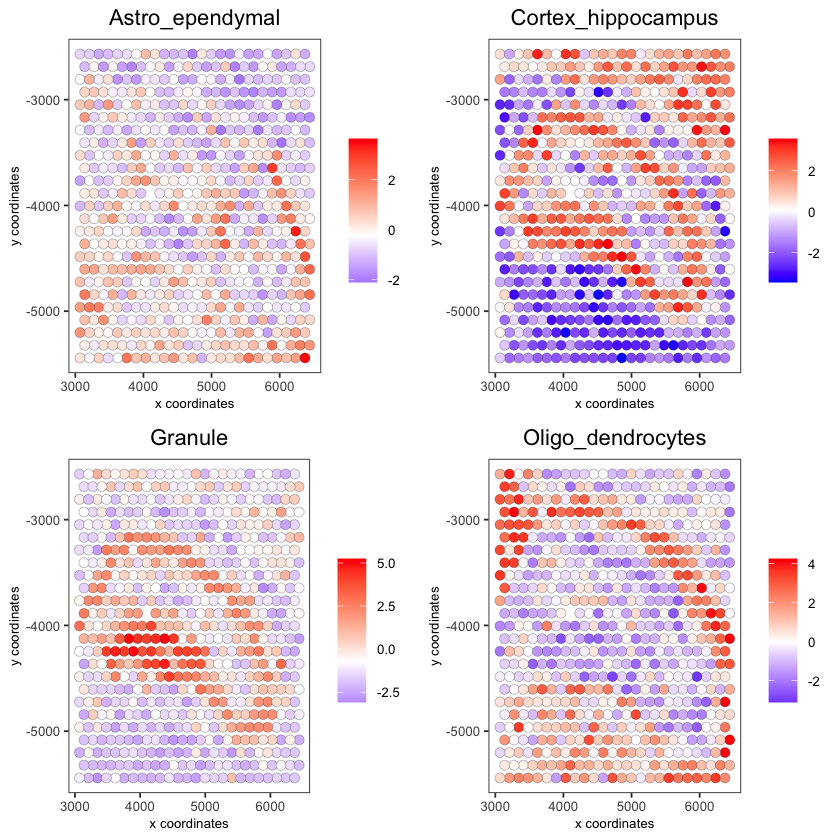

In [12]:
cell_types_subset = colnames(signature_matrix)
spatCellPlot(gobject = my_vis_object, 
             spat_enr_names = 'PAGE',
             cell_annotation_values = cell_types_subset,
             cow_n_col = 2,coord_fix_ratio = NULL, point_size = 2.75)[0]